<div class="alert alert-danger">
    This session will be recorded.
</div>

# "Isochrones" with OSM


How far can you travel on foot in 15 minutes?

<img src="images/isos.png" width=800>



## What is open street map?

![osm](images/OSM.png)

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the OpenStreetMap Wiki.

OSM has a large userbase with more than 7 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 6.5 billion nodes and counting! (stats from January 2021).

OpenStreetMap is used not only for integrating the OSM maps as background maps to visualizations or online maps, but also for many other purposes such as routing, geocoding, education, and research. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development. Read more about humanitarian projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org/).


- https://www.openstreetmap.org/
- [OSM stats](https://wiki.openstreetmap.org/wiki/Stats)

## OSMnx

<a href="https://www.spur.org/publications/urbanist-article/2012-11-09/grand-reductions-10-diagrams-changed-city-planning" target="_blank"><img src="https://www.spur.org/sites/default/files/migrated/images/F22.jpg" width=400></a>

[[Image source]](https://www.spur.org/publications/urbanist-article/2012-11-09/grand-reductions-10-diagrams-changed-city-planning)

Allan Jacobs’ seminal treatise Great Streets (1993) takes figure-ground analysis to a new level, showing 50 one-mile-square maps of cities around the world, all drawn to the same scale.


This week we will explore a Python module called OSMnx that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called NetworkX.

<img src="https://i2.wp.com/geoffboeing.com/wp-content/uploads/2017/04/square-mile-street-networks.jpg?resize=768%2C617&ssl=1" width=400>

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  

## What's an isochrone map?

<img src="https://www.tandfonline.com/na101/home/literatum/publisher/tandf/journals/content/cppr20/2017/cppr20.v032.i04/02697459.2017.1329487/20171208/images/large/cppr_a_1329487_f0001_oc.jpeg" width=800>

- [Isochrone Mapping of Urban Transport: Car-dependency, Mode-choice and Design Research](https://www.tandfonline.com/doi/figure/10.1080/02697459.2017.1329487?scroll=top&needAccess=true)


## Import the libraries

In [1]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis 
import osmnx as ox

# for basemaps
import contextily as ctx

# for interactive webmaps
import folium

## Download and prep the street network

When fetching network data from OpenStreetMap using `OSMnx`, it is possible to define the type of street network using the `network_type` parameter (options: `drive`, `walk` and `bike`). Below, we define the parameters that will determine the results of this lab.

There are several methods to bring in Open Street Map data using OSMNX. Choose one that best suits your needs:

Query type | Example scenario| OSMNX command
---|---|---
You have an address and specified distance buffer | 1 kilometer buffer from UCLA | [osmnx.graph.graph_from_address](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_address)
You have a specific lat/lon coordinate pair and specified distance buffer| 1 kilometer buffer from `[34.12,-118.55]` | [osmnx.graph.graph_from_point](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_point)
You have a general location or address that has defined boundaries | a neighborhood, zipcode, village, or small city | [osmnx.graph.graph_from_place](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_place)


In [2]:
# And now we're going to download and prep the street network. So we're going to fetch this network data from OSMnx, and it's possible to find the type of street network using network type parameters. So in this case, these are the 3 options. We can look at, drive, walk, and bike. And we're gonna set up parameters. We can set up the walk time. So specifically, we're gonna look at walking. And then we are going to calculate how many meters we can walk in a minutes, which in this case will be 75. If you're a slower or faster Walker, you would just convert between how many, I guess, miles you could walk in a minute to meters per minute. Because the projection system that we're working with we'll take into account the default units are meters for this projection system. So it's just easier to work with meters, several methods to bring in street network data. 
# You can do graph from address. So if you have a specific address like, you search for an address on Google Maps. You can copy and paste that in. I'd also recommend using nominatum from 2 weeks ago, because that is the official sort of open street map, Google Maps version.
# We're gonna work with latitude longitude. So you can graph from point. That's what we'll do or you can have a general location.

# configure the place, network type, trip times, and travel speed
# latlon = [34.05917229622864, -118.27749316135392]
latlon = [34.062443133500956, -118.29091192054261]
network_type = 'walk'
trip_times = [5, 10, 15] #in minutes
meters_per_minute = 75 # travel distance per minute

In [3]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# download the street network
G = ox.graph_from_point(latlon, network_type=network_type, dist = 2000) #2000 means 2000 meters
# this is not a geodata frame, it's a different data type. And so we imported OSMnx as ox. And we're graphing from point because we're feeding in latitude and longitude up here.

CPU times: user 4.19 s, sys: 121 ms, total: 4.31 s
Wall time: 4.48 s


In [4]:
# what is G?
type(G)

networkx.classes.multidigraph.MultiDiGraph

- [Networkx multidigraph](https://networkx.org/documentation/stable/reference/classes/multidigraph.html)

Quick plot to visualize data.

- [plot_graph](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=plot_graph#osmnx.plot.plot_graph)

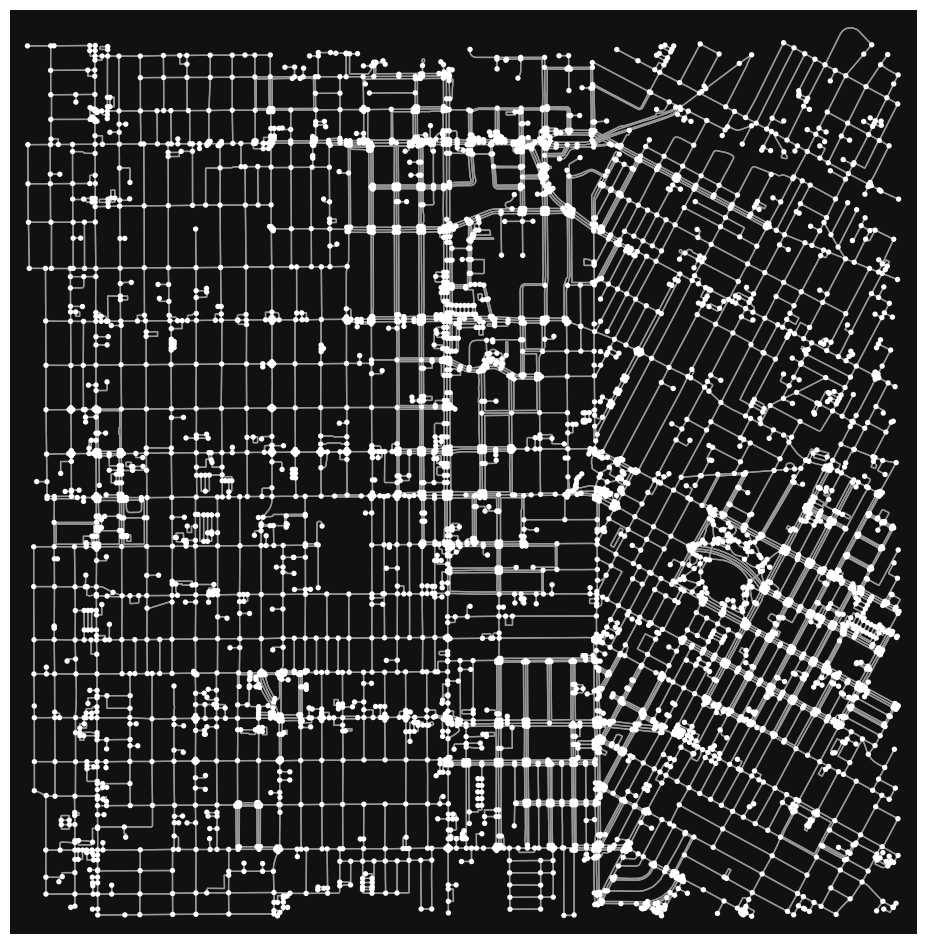

In [5]:
# quick plot using oxmnx
fig, ax = ox.plot_graph(G,figsize=(12,12))
# fig, ax means that here we're saying for the data that will be our figure within an empty X and Y axis.
# ox.plot_graph means what graph are we plotting. We are plotting G, which is the multi-d graph figure size is going to be 12 by 12 pixels.
# this is one data set combining points and lines. So we're going to need to export these separately, and one line of code to 2 geodata frames, one that is the points, and one that is the street lines.

## Project to web mercator

![projections](https://www.esri.com/arcgis-blog/wp-content/uploads/2022/02/grid2.png)

In order to conduct spatial analysis, it is recommended to use a projected coordinate system, rather than a geographic coordinate system (which uses angular measurements). Here is a [blog post from ESRI](https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/gcs_vs_pcs/) that describes the differences between the two.

In [6]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(G, to_crs='epsg:3857')


# We won't get too into the weeds about why projections are important, but they are like having a whole nerdy lecture about projections. But essentially these are distortions of our 3D world. 3D Data stretched to 2D. In this case, web mapping. So when we conduct spatial analysis. We need to project our data using a projected coordinate system, the 4326 is sort of the general GCS, which is a geographic coordinate system, chooses angles or decimal degrees. But if we are going to look at how far we can walk from a point. We need a projected coordinate system that works with meters. You can click this. Yeah, Esri link to learn more about the differences between the two. But essentially, we just need to reproject our data to web. Mercator 3857. In order to run our code. If we don't, we won't be able to run our code.

## Convert edges and nodes to geodataframes

OSMnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let’s extract the nodes and edges from the graph as GeoDataFrames:

In [7]:
# convert nodes and edges to geodataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# luckily we can get two geodataframe from one line of code
# street_count means how many streets come cross at that intersection

In [8]:
gdf_nodes.sample(10)

y             x   highway  street_count         lon  \
osmid                                                                         
9429765064   4.038980e+06 -1.316710e+07  crossing             4 -118.282057   
122600590    4.038330e+06 -1.316576e+07       NaN             3 -118.270045   
1902280405   4.039189e+06 -1.316637e+07       NaN             3 -118.275512   
11289902535  4.036570e+06 -1.316587e+07  crossing             4 -118.271051   
7271481175   4.036557e+06 -1.316852e+07       NaN             3 -118.294868   
9686455904   4.036183e+06 -1.316760e+07  crossing             4 -118.286594   
5998942583   4.037104e+06 -1.316815e+07       NaN             4 -118.291513   
2118017878   4.037146e+06 -1.316745e+07       NaN             3 -118.285243   
6787401008   4.037797e+06 -1.316815e+07       NaN             4 -118.291533   
6418754715   4.036705e+06 -1.316638e+07       NaN             1 -118.275638   

                   lat                           geometry  
osmid                                                      
9429765064   34.075763  POINT (-13167098.355 4038979.742)  
122600590    34.070930  POINT (-13165761.152 4038330.214)  
1902280405   34.077323  POINT (-13166369.803 4039189.374)  
11289902535  34.057835  POINT (-13165873.162 4036570.486)  
7271481175   34.057738  POINT (-13168524.491 4036557.439)  
9686455904   34.054947  POINT (-13167603.412 4036182.508)  
5998942583   34.061806  POINT (-13168150.970 4037104.044)  
2118017878   34.062118  POINT (-13167453.064 4037146.022)  
6787401008   34.066964  POINT (-13168153.219 4037797.244)  
6418754715   34.058835  POINT (-13166383.740 4036704.827)

In [9]:
gdf_nodes

y             x          highway  street_count  \
osmid                                                                    
14940287     4.034890e+06 -1.316734e+07  traffic_signals             3   
7700837712   4.034903e+06 -1.316734e+07         crossing             4   
122656766    4.034845e+06 -1.316734e+07              NaN             4   
7700837711   4.034893e+06 -1.316732e+07         crossing             4   
15855775     4.037091e+06 -1.317011e+07  traffic_signals             4   
...                   ...           ...              ...           ...   
11457448336  4.036320e+06 -1.316726e+07              NaN             1   
11457448345  4.035230e+06 -1.316808e+07              NaN             1   
11457448351  4.035214e+06 -1.316815e+07              NaN             3   
11458877513  4.038797e+06 -1.316688e+07              NaN             1   
11539991645  4.035596e+06 -1.317006e+07              NaN             1   

                    lon        lat                           geometry  
osmid                                                                  
14940287    -118.284211  34.045330  POINT (-13167338.104 4034890.309)  
7700837712  -118.284217  34.045427  POINT (-13167338.805 4034903.435)  
122656766   -118.284188  34.044992  POINT (-13167335.622 4034844.980)  
7700837711  -118.284083  34.045348  POINT (-13167323.889 4034892.795)  
15855775    -118.309108  34.061706  POINT (-13170109.659 4037090.593)  
...                 ...        ...                                ...  
11457448336 -118.283495  34.055969  POINT (-13167258.455 4036319.814)  
11457448345 -118.290907  34.047858  POINT (-13168083.577 4035229.971)  
11457448351 -118.291494  34.047742  POINT (-13168148.900 4035214.359)  
11458877513 -118.280072  34.074401  POINT (-13166877.397 4038796.683)  
11539991645 -118.308623  34.050581  POINT (-13170055.624 4035595.896)  

[4986 rows x 7 columns]

<Axes: >

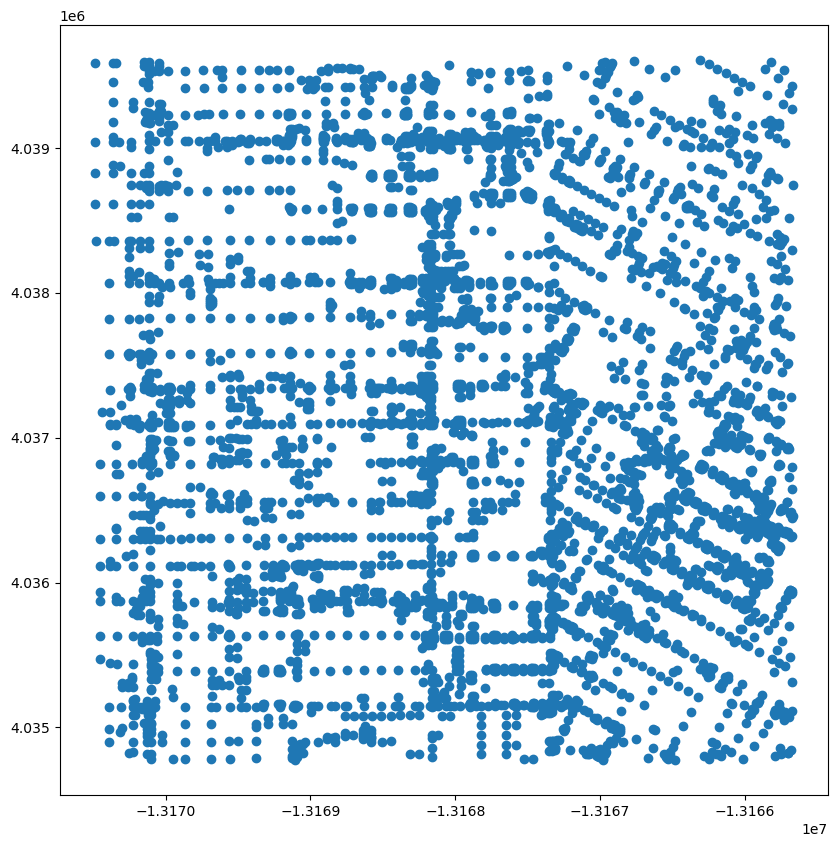

In [10]:
gdf_nodes.plot(figsize=(10,10))

In [11]:
gdf_edges.head()
#  the length is the length of the roads which we will come back to in order to calculate travel time.

osmid lanes                   name    highway  \
u          v          key                                                      
14940287   7700837712 0     47899508     4    South Hoover Street  secondary   
           122656766  0    398757820     5    South Hoover Street    primary   
           7700837711 0    173217408     2  South Alvarado Street    primary   
7700837712 14940287   0     47899508     4    South Hoover Street  secondary   
           7700837691 0    824716204   NaN                    NaN    footway   

                           oneway reversed  length  \
u          v          key                            
14940287   7700837712 0     False     True  10.879   
           122656766  0     False    False  37.573   
           7700837711 0     False     True  11.995   
7700837712 14940287   0     False    False  10.879   
           7700837691 0     False    False  11.555   

                                                                    geometry  \
u          v          key                                                      
14940287   7700837712 0    LINESTRING (-13167338.104 4034890.309, -131673...   
           122656766  0    LINESTRING (-13167338.104 4034890.309, -131673...   
           7700837711 0    LINESTRING (-13167338.104 4034890.309, -131673...   
7700837712 14940287   0    LINESTRING (-13167338.805 4034903.435, -131673...   
           7700837691 0    LINESTRING (-13167338.805 4034903.435, -131673...   

                          maxspeed access tunnel service bridge  
u          v          key                                        
14940287   7700837712 0        NaN    NaN    NaN     NaN    NaN  
           122656766  0        NaN    NaN    NaN     NaN    NaN  
           7700837711 0        NaN    NaN    NaN     NaN    NaN  
7700837712 14940287   0        NaN    NaN    NaN     NaN    NaN  
           7700837691 0        NaN    NaN    NaN     NaN    NaN

<Axes: >

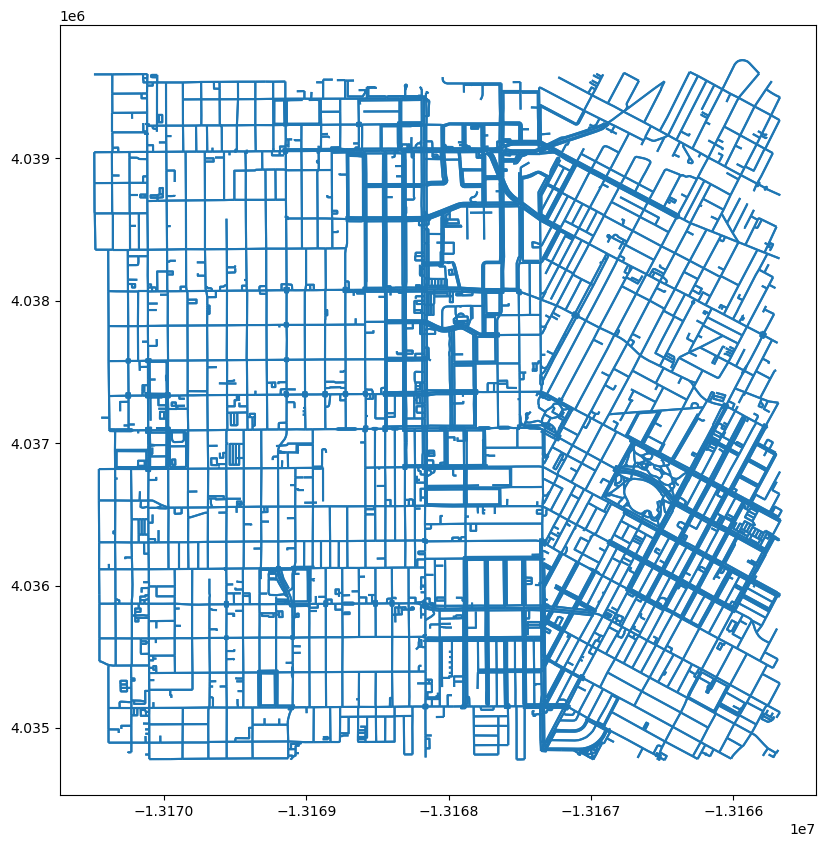

In [12]:
gdf_edges.plot(figsize=(10,10))

There are many columns in our GeoDataFrame. Most of the columns are fairly self-explanatory but the following table describes all of them.

Most of the attributes come directly from the OpenStreetMap, however, columns `u` and `v` are Networkx specific ids. You can click on the links to get more information about each attribute:


| Column                                                     | Description                 | Data type         |
|------------------------------------------------------------|-----------------------------|-------------------|
| [bridge](http://wiki.openstreetmap.org/wiki/Key:bridge)    | Bridge feature              | boolean           |
| geometry                                                   | Geometry of the feature     | Shapely.geometry  |
| [highway](http://wiki.openstreetmap.org/wiki/Key:highway)  | Tag for roads (road type)   | str / list        |
| [lanes](http://wiki.openstreetmap.org/wiki/Key:lanes)      | Number of lanes             | int (or nan)      |
| [length](http://wiki.openstreetmap.org/wiki/Key:length)    | Length of feature (meters)  | float             |
| [maxspeed](http://wiki.openstreetmap.org/wiki/Key:maxspeed)| maximum legal speed limit   | int /list         |
| [name](http://wiki.openstreetmap.org/wiki/Key:name)        | Name of the (street) element| str (or nan)      |
| [oneway](http://wiki.openstreetmap.org/wiki/Key:oneway)    | One way road                | boolean           |
| [osmid](http://wiki.openstreetmap.org/wiki/Node)           | Unique ids for the element  | list              |
| [u](http://ow.ly/bV8n30h7Ufm)                              | The first node of edge      | int               |
| [v](http://ow.ly/bV8n30h7Ufm)                              | The last node of edge       | int               |


Let's take a look what kind of features we have in the `highway` column:

In [13]:
gdf_edges['highway'].value_counts()

highway
footway                          4884
service                          3578
residential                      3304
tertiary                         1462
secondary                        1108
primary                          1100
steps                              34
[footway, steps]                   32
primary_link                       30
secondary_link                     14
[footway, service]                 12
[residential, service]             12
tertiary_link                       6
path                                6
[footway, residential]              6
[footway, steps, residential]       2
[path, service]                     2
[secondary, residential]            2
[secondary, primary]                2
Name: count, dtype: int64

## Get the centroid

For this lab, we will use the centroid of the street network as the point from which to conduct our travel isochrone maps. Note that this needs to be somewhere within the street network to build the isochrone, and does not necessarily have to be the centroid.

- [geopandas `total_bounds`](https://geopandas.readthedocs.io/en/latest/docs/reference/api/geopandas.GeoSeries.total_bounds.html)

In [14]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13170490.415952718
4034773.9381230334
-13165667.866368419
4039606.8087794576


In [15]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13168079.141160568
4037190.3734512455


## Get the nearest node to the lat/lon point

Let's now find the nearest graph node (and its node ID) to the centroid point using OSMnx [distance.nearest_nodes](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.nearest_nodes). 


In [16]:
# use osmnx's distance.nearest_nodes command to get the id for the nearest node
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 3876098660


In [17]:
# what is this record?
gdf_nodes.loc[[center_node]]

# "loc" gets rows or columns with a particular labels from the index whereas "iloc" gets rows at a particular position in the index, so it only takes integers. 
# So in this case, loc, which we just did, can look at aparticular rows with text are integers depending on a specific value, whereas iloc searches for an index position row.
# So although the index is numeric and our OSM ID. It's doesn't represent like the 3 millionth location and our data, there's only 5,000 rows. So are approximately 5,000 rows. So it's just one location. It's not the 3 millionth row our index position. So that is why we use loc.

y             x highway  street_count         lon  \
osmid                                                                      
3876098660  4.037104e+06 -1.316806e+07     NaN             3 -118.290735   

                  lat                           geometry  
osmid                                                     
3876098660  34.061808  POINT (-13168064.397 4037104.313)

Why `loc` and not `iloc`? The differences are confusing...

-  loc gets rows (or columns) with particular labels from the index
-  iloc gets rows (or columns) at particular positions in the index (so it only takes integers)

In this case, although the index is numeric, it does not represent a cumulative position in the dataframe, but rather is a reference to the OSM ID for that node. Therefore, we must use `loc` instead of `iloc`.

## Map the network layers

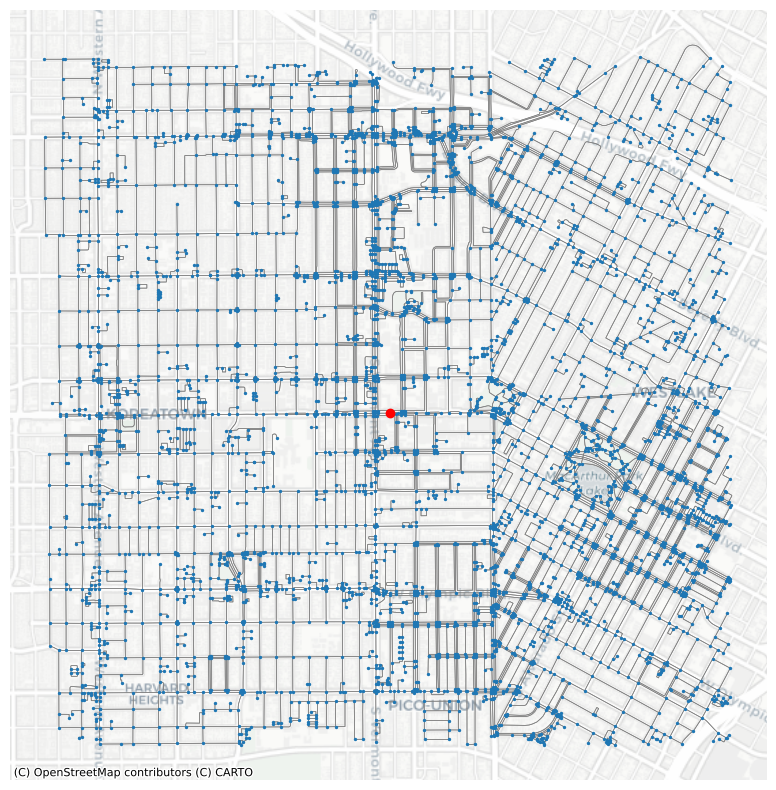

In [18]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))
# "fig ax" means "fig" where we're going to send the data and "ax" setting up the X and Y axis axes.
# And then this is familiar to all of us. We're creating a subplot with figure size equal to 10, 10.

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)
# We're going to plot gdf underscore edges plots. 
# So the lines are the street network and we're we're sending this data to the empty axis (this is the meaning of ax=ax).
# zorder relates to the position, the three-dimensional position of how each layer will be drawn. 
# So the base map is going to be zorder 0, it's going to be underneath all the data. zorder 1, we're going to plot the lines on top of the base map.

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)
# "gdf_nodes" is going to be all the points. zorder 20 or 2. 
# The circles are going to be on top of the lines, so the lines don't go over the top of the circles, and then they're hard to see, because there's a gray line running through our nodes and marker size is similar to line width.

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)
# zorder is equal to 30. So it's going to be the topmost layer that we see in the map.

# zorder is important to decide the layer order. if it is wrong, the order of edges and nodes.

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)
# Essentially, what we're doing here is creating an overlay map. An overlay map is a map with multiple layers layered on top of each other and then turn off the axes. We don't need to see the X and Y meters values. 
# And then we're going to add a contextilly base map and our source. So we're going to send it to ax up here and we're gonna use Cardododb, dot positron, which is that light grey base map hit shift enter.

# Create isochrones

How far can you walk in 5, 10, 15, and 20 minutes from the central node? 

## Calculating travel cost

Now comes the fun part. We have thus far:

- downloaded nodes and edges for our place of interest
- reprojected them to web mercator for spatial analysis
- converted the data to geodataframes
- determined the centroid of the network
- determined the node closest to the centroid to conduct create isochrone maps

In order to create isochrone maps, we need to associate a **cost** to each edge in our network. In other words, we need an attribute that tells us exactly how long it would take an average person to traverse the distance of each edge in our network.

In [19]:
# a quick look at the data
gdf_edges[['osmid','name','highway','length']].sample(5)

# cost means walking or driving time

osmid                        name  \
u          v          key                                           
5939885092 5939885093 0     629125442                         NaN   
6817116949 6114648872 0     652167237                         NaN   
122807467  122583796  0    1231699057            West 12th Street   
1966165299 1966165248 0     161710498      South Park View Street   
7882972876 123000361  0     844948678  South Occidental Boulevard   

                               highway   length  
u          v          key                        
5939885092 5939885093 0        service   50.692  
6817116949 6114648872 0        footway   10.801  
122807467  122583796  0    residential  101.881  
1966165299 1966165248 0    residential   78.588  
7882972876 123000361  0    residential   33.694

In [20]:
# create a new column, calculate the time it takes to travel that edge
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

Now let's do a spot check. If a person travels 75 meters per minute, do the numbers in the new `walk_time` column make sense?

In [21]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

osmid               name  \
u          v           key                                               
123160395  123160398   0                   13379632      Beacon Avenue   
2514214529 6910778558  0                  161698252  San Marino Street   
2118017945 2118131675  0                  201797313                NaN   
122928100  122928102   0                   13339542  Middlebury Street   
6418874067 5998787926  0    [1022418670, 629128383]                NaN   
7825124369 9403480643  0                  838477120                NaN   
1966165278 7361703223  0                  787360407                NaN   
380005694  5999156456  0                  723645005                NaN   
6726034861 11356988980 0                  715686441                NaN   
1736709450 473944793   0                   39551420                NaN   

                                 highway   length  walk_time  
u          v           key                                    
123160395  123160398   0     residential  185.293   2.470573  
2514214529 6910778558  0     residential   44.268   0.590240  
2118017945 2118131675  0         footway    7.874   0.104987  
122928100  122928102   0     residential  109.892   1.465227  
6418874067 5998787926  0         footway  260.400   3.472000  
7825124369 9403480643  0         footway   14.693   0.195907  
1966165278 7361703223  0         service   56.276   0.750347  
380005694  5999156456  0         footway    8.535   0.113800  
6726034861 11356988980 0         service  100.702   1.342693  
1736709450 473944793   0    primary_link   70.927   0.945693

## Choosing colors (cmap) for our isochrones

- https://matplotlib.org/examples/color/colormaps_reference.html

sequential is good for showing grading, while divergent is good for showing positive and negative.

OSMnx has included a super handy utility [`get_colors`](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=get_colors#osmnx.plot.get_colors) to extract colors from existing cmap color bands. The way it works is that you ask for any number of colors (since we have 4 travel times, we want 4 colors), give it a cmap name, and it returns you a list of colors. 

In [22]:
# choose a colormap
cmap = 'RdYlGn'

In [23]:
# assign a color hex code (6 digits code for each color on Adobe) for each trip time isochrone
# this is a code for creating a new column of assigned colors for each trip time
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap=cmap, 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15]
['#a50026', '#feffbe', '#006837']


In [24]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(5, '#a50026'), (10, '#feffbe'), (15, '#006837')]

What are zipped lists in python?

- https://towardsdatascience.com/zip-function-in-python-da91c248385d

In [25]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 5 minutes is #a50026
The color for 10 minutes is #feffbe
The color for 15 minutes is #006837


## Color each node based on travel time from point of interest

Now that we have determined the color for each travel time, let's loop through each time/color, and assign the nodes that fall within that travel time. To do so, we use a feature from [NetworkX called `ego_graph`.](https://networkx.org/documentation/stable//reference/generated/networkx.generators.ego.ego_graph.html) The ego graph determines which nodes fall within a given "radius", which in our case is determined by time.

The following loop does:

- loops through each time/color
- creates an ego graph for each time/color
- assigns the time/color in the geodataframe to each node that falls within

But first, let's reverse the time/color list. Why? We need to draw the nodes from the outside, in. In other words, all nodes that are "walkable" within 20 minutes include nodes that are "walkable" for 15, 10, or 5 minutes. Then, we draw the nodes that are within 15 minutes, overriding the colors for those nodes in the inner circle... and so on. 

In [26]:
# reverse the order so that outside nodes get associated first
time_color.reverse()
# time_color.sort(reverse=True)
time_color

[(15, '#006837'), (10, '#feffbe'), (5, '#a50026')]

In [27]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time,distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ' + color)
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = time
        gdf_nodes.loc[node,'color'] = color

There are 583 nodes within 15 minutes #006837
There are 267 nodes within 10 minutes #feffbe
There are 63 nodes within 5 minutes #a50026


In [28]:
# spot check
gdf_nodes.sample(10)

y             x          highway  street_count  \
osmid                                                                    
122735416    4.036984e+06 -1.316713e+07  traffic_signals             4   
6726995888   4.037667e+06 -1.316605e+07              NaN             1   
122746293    4.038395e+06 -1.316676e+07              NaN             4   
1788092721   4.037937e+06 -1.316649e+07              NaN             4   
5999294770   4.039057e+06 -1.316777e+07         crossing             4   
6418893229   4.039039e+06 -1.316762e+07              NaN             3   
6807585994   4.036841e+06 -1.316961e+07              NaN             1   
122656750    4.035750e+06 -1.316685e+07  traffic_signals             4   
6787400996   4.037766e+06 -1.316819e+07              NaN             4   
10884635805  4.034930e+06 -1.316883e+07              NaN             3   

                    lon        lat                           geometry  time  \
osmid                                                                         
122735416   -118.282339  34.060914  POINT (-13167129.758 4036984.197)  15.0   
6726995888  -118.272673  34.065994  POINT (-13166053.755 4037666.827)   NaN   
122746293   -118.279003  34.071410  POINT (-13166758.408 4038394.720)   NaN   
1788092721  -118.276567  34.068001  POINT (-13166487.222 4037936.598)   NaN   
5999294770  -118.288065  34.076336  POINT (-13167767.163 4039056.711)   NaN   
6418893229  -118.286713  34.076204  POINT (-13167616.625 4039039.011)   NaN   
6807585994  -118.304645  34.059846  POINT (-13169612.818 4036840.715)   NaN   
122656750   -118.279848  34.051727  POINT (-13166852.495 4035749.802)   NaN   
6787400996  -118.291821  34.066733  POINT (-13168185.223 4037766.202)  15.0   
10884635805 -118.297611  34.045625  POINT (-13168829.796 4034930.049)   NaN   

               color  
osmid                 
122735416    #006837  
6726995888       nan  
122746293        nan  
1788092721       nan  
5999294770       nan  
6418893229       nan  
6807585994       nan  
122656750        nan  
6787400996   #006837  
10884635805      nan

In [29]:
# we will use the .replace to fill the 'nan' values in the color column to be a grey color 
gdf_nodes['color'] = gdf_nodes['color'].replace('nan', '#cccccc')

In [30]:
# another spot check: are all values in the color column populated?
gdf_nodes.sample(10)

y             x          highway  street_count  \
osmid                                                                   
2624887924  4.038152e+06 -1.316625e+07              NaN             3   
2514214088  4.034805e+06 -1.316913e+07              NaN             3   
6805901896  4.037712e+06 -1.317015e+07              NaN             1   
1966165306  4.035623e+06 -1.316779e+07              NaN             3   
6807503263  4.035790e+06 -1.317020e+07              NaN             4   
4399335411  4.036495e+06 -1.316584e+07              NaN             3   
6787310897  4.037819e+06 -1.316914e+07              NaN             4   
6788597163  4.035822e+06 -1.316950e+07              NaN             1   
8230271443  4.037296e+06 -1.316604e+07              NaN             3   
123198164   4.037902e+06 -1.316712e+07  traffic_signals             4   

                   lon        lat                           geometry  time  \
osmid                                                                        
2624887924 -118.274431  34.069603  POINT (-13166249.422 4038151.842)   NaN   
2514214088 -118.300276  34.044694  POINT (-13169126.440 4034804.932)   NaN   
6805901896 -118.309495  34.066330  POINT (-13170152.784 4037712.059)   NaN   
1966165306 -118.288313  34.050785  POINT (-13167794.748 4035623.278)   NaN   
6807503263 -118.309928  34.052023  POINT (-13170200.907 4035789.571)   NaN   
4399335411 -118.270777  34.057277  POINT (-13165842.660 4036495.456)   NaN   
6787310897 -118.300378  34.067128  POINT (-13169137.840 4037819.215)   NaN   
6788597163 -118.303612  34.052264  POINT (-13169497.847 4035821.965)   NaN   
8230271443 -118.272505  34.063233  POINT (-13166035.009 4037295.890)   NaN   
123198164  -118.282212  34.067745  POINT (-13167115.554 4037902.089)   NaN   

              color  
osmid                
2624887924  #cccccc  
2514214088  #cccccc  
6805901896  #cccccc  
1966165306  #cccccc  
6807503263  #cccccc  
4399335411  #cccccc  
6787310897  #cccccc  
6788597163  #cccccc  
8230271443  #cccccc  
123198164   #cccccc

<Axes: >

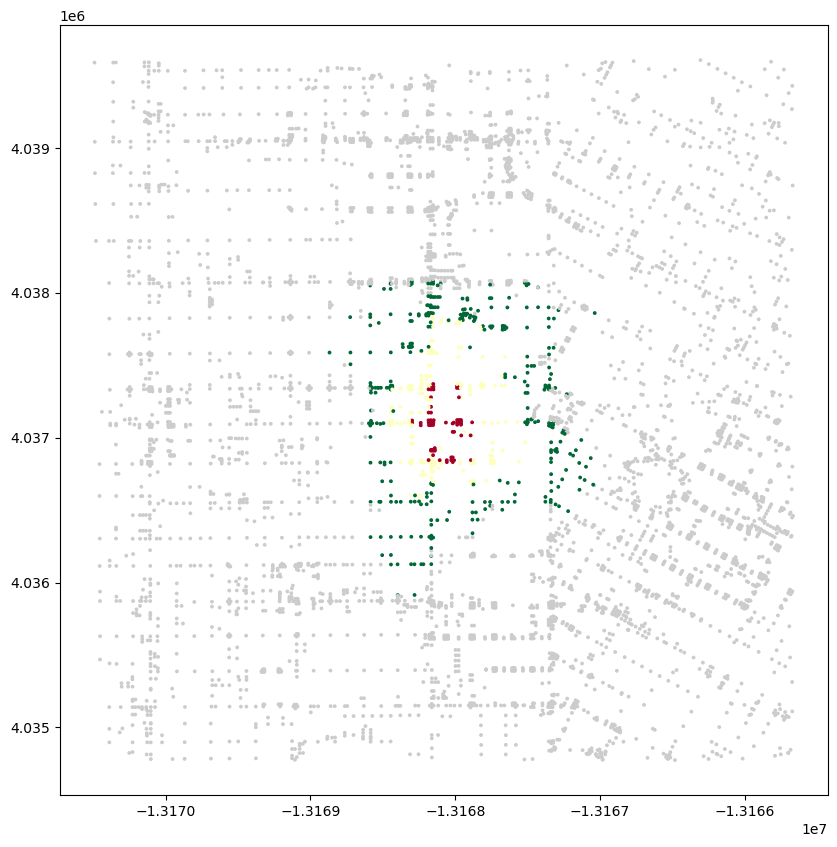

In [31]:
# map it
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3,
               )

## Create polygons for each time area

Now we create polygons for each time area. For example, this is how you would create a polygon that "surrounds" all the 5 minute nodes.

In [32]:
# put the 5 minute nodes in a variable
gdf_5 = gdf_nodes[gdf_nodes['time']==5]

<Axes: >

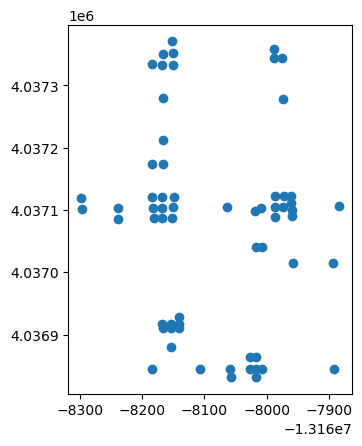

In [33]:
# plot it
gdf_5.plot()

Points are great, but polygons are visually more informative. For this, we create a [convex hull](https://medium.com/@harshitsikchi/convex-hulls-explained-baab662c4e94).

![convex hull](https://miro.medium.com/max/1489/1*F4IUmOJbbLMJiTgHxpoc7Q.png)

[source](https://miro.medium.com/max/1489/1*F4IUmOJbbLMJiTgHxpoc7Q.png)

Note that this is one of many possible geometric manipulations in python. Check out a few others:

- https://pythongis.org/part2/chapter-06/nb/03-geometric-manipulation.html

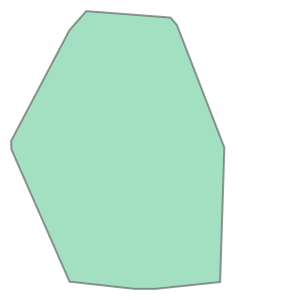

In [34]:
# combine all the points (unary_union) and create a convex hull polygon
gdf_5.unary_union.convex_hull

## Dissolve to the rescue!

Now that we understand the process of how the isochrones will be created (from points to convex hulls), let's apply this to each of our travel times. The `dissolve` function is a handy geopandas tool that collapses and groups our data based on a given category. We can use this to create grouped points per time period.

- https://geopandas.org/aggregation_with_dissolve.html

In [35]:
# dissolve the nodes by time
# adding the "time" argument creates a separate geometry (multipoint in this case) for each unique time category
isochrones = gdf_nodes.dissolve(by = "time")
isochrones

geometry             y  \
time                                                                    
5.0   MULTIPOINT ((-13168297.544 4037118.717), (-131...  4.037104e+06   
10.0  MULTIPOINT ((-13168457.099 4037101.007), (-131...  4.036967e+06   
15.0  MULTIPOINT ((-13168867.923 4037587.758), (-131...  4.036340e+06   

                 x          highway  street_count         lon        lat  \
time                                                                       
5.0  -1.316817e+07  traffic_signals             4 -118.291665  34.061805   
10.0 -1.316774e+07  traffic_signals             3 -118.287847  34.060789   
15.0 -1.316788e+07  traffic_signals             3 -118.289084  34.056121   

        color  
time           
5.0   #a50026  
10.0  #feffbe  
15.0  #006837

In [36]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index(name='geometry')
isochrones

time                                           geometry
0   5.0  POLYGON ((-13168057.974 4036831.377, -13168184...
1  10.0  POLYGON ((-13168236.719 4036559.818, -13168306...
2  15.0  POLYGON ((-13168397.153 4035913.423, -13168584...

In [37]:
# reverse the order so that outer polygon gets drawn first
isochrones.sort_values(by='time', ascending=False,inplace=True)
isochrones

time                                           geometry
2  15.0  POLYGON ((-13168397.153 4035913.423, -13168584...
1  10.0  POLYGON ((-13168236.719 4036559.818, -13168306...
0   5.0  POLYGON ((-13168057.974 4036831.377, -13168184...

In [38]:
# reverse the colors too!
iso_colors.reverse()
iso_colors

['#006837', '#feffbe', '#a50026']

<Axes: >

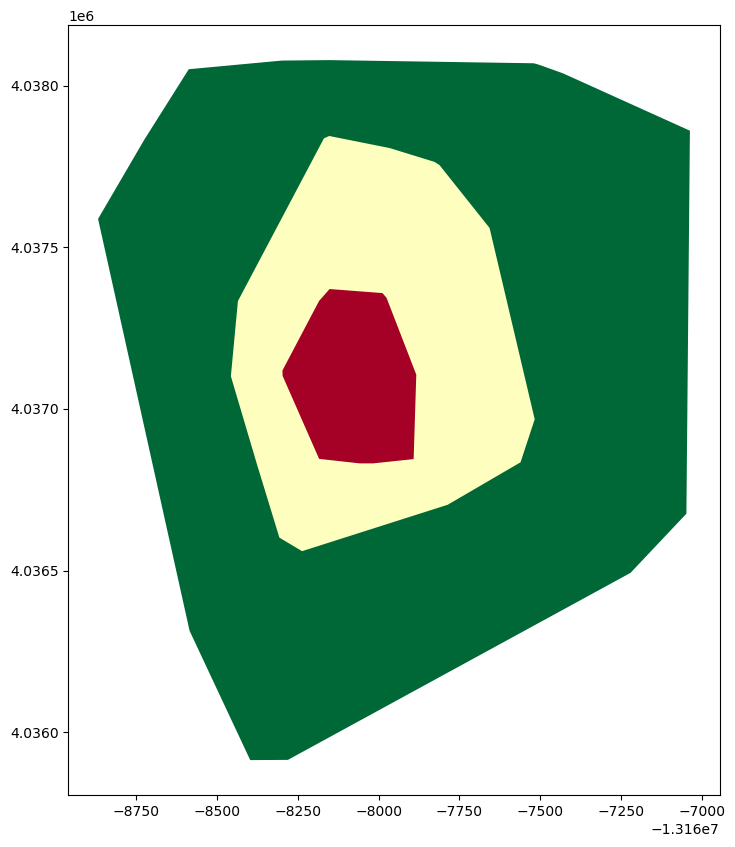

In [39]:
isochrones.plot(figsize=(10,10),alpha=1,color=iso_colors, legend=True)

# Putting it all together

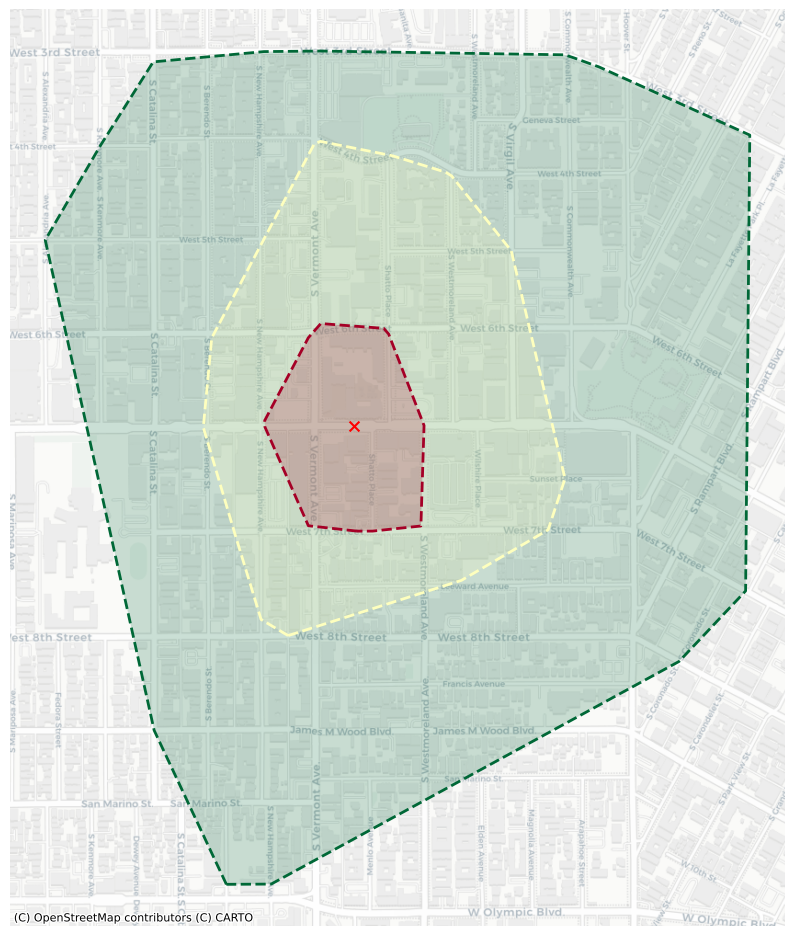

In [40]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrone boundary
isochrones.boundary.plot(
    ax=ax,
    alpha=1,
    linestyle='--',
    color=iso_colors,
    lw=2
    ) 

# add the isochrones
isochrones.plot(
    ax=ax, 
    alpha=0.2, 
    categorical=True, # even though it is numeric, treat it as categorical
    color=iso_colors,
    )

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r',marker='x',markersize=50)

# hide the axis
ax.axis('off')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Adding custom legends

Inspired by Monisha's [impressive notebook](https://github.com/lucybriggs12/snakeemoji/blob/e56406aef7de1a683512490bee9e29150c24770e/Group%20Assignments/Week%2005/Monisha_Reginald_Midterm_Notebook.ipynb), I'd like to introduce additional customization options for your map outputs: legends. Often times with any graphical outputs, one can choose to accept the defaults, or spend additional time to modify it to best suit your overall design ideas.

In [41]:
# to draw custom legend elements, import these libraries
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

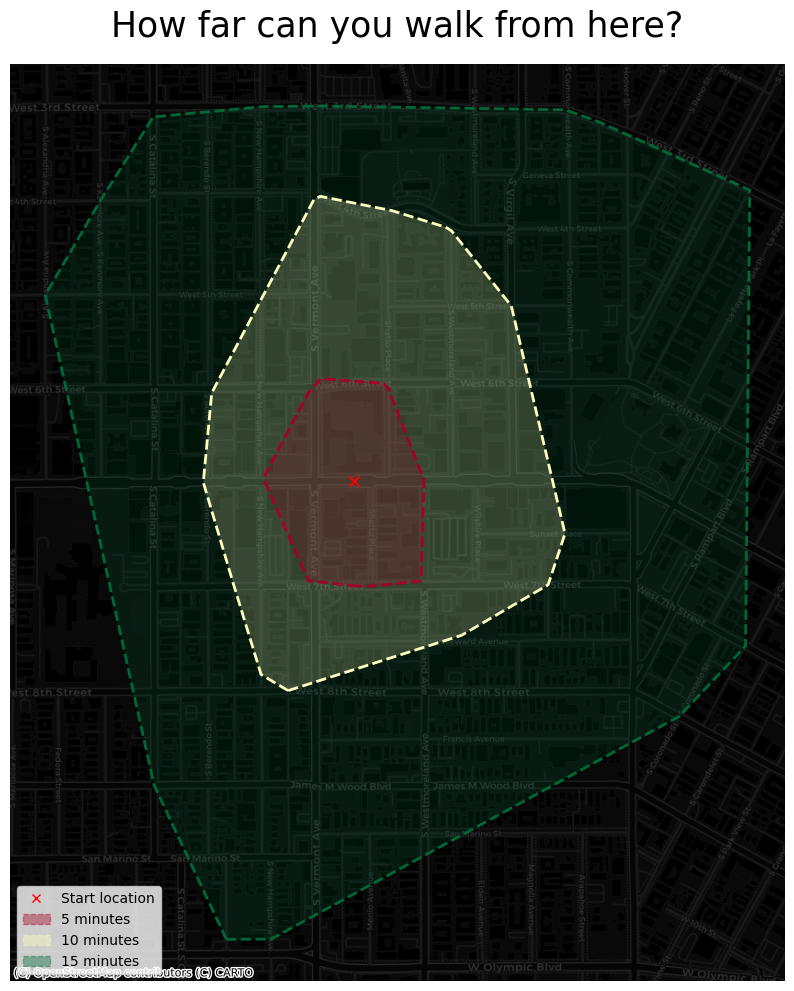

In [42]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrone boundary
isochrones.boundary.plot(
    ax=ax,
    alpha=1,
    linestyle='--',
    color=iso_colors,
    lw=2
    ) 

# add the isochrones
isochrones.plot(
    ax=ax, 
    alpha=0.2, 
    categorical=True, # even though it is numeric, treat it as categorical
    color=iso_colors,
    )

# add the center node in red
gdf_nodes.loc[[center_node]].plot(
    ax=ax,
    color='r',
    marker='x',
    markersize=50
    )

# build custom legend
legend_elements = [
    # add the center node to the legend
    Line2D([0], [0], marker='x', color='red', linestyle='',label='Start location', markersize=6),
    ]

# sort back to small time to large time
# time_color.sort(reverse=False)
time_color.reverse()

# loop through the list of time/colors and add each to the legend
for time,color in list(time_color):
    legend_item = Patch(facecolor=color, edgecolor=color, linestyle='--',linewidth=1,label=str(time)+' minutes',alpha=0.4)
    legend_elements.append(legend_item)

# add the legend
ax.legend(handles=legend_elements,loc='lower left') # location options: upper/center/lower and left/center/right

# add a title
ax.set_title('How far can you walk from here?',fontsize=25,pad=20)

# hide the axis
ax.axis('off')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)


In [43]:
m = folium.Map(location=latlon,zoom_start=15, tiles='Cartodb Positron')
# and here comes the wow factor...
isochrones.explore(m=m,column='time',cmap=cmap,categorical=True)
gdf_nodes.explore(m=m,column='time')